In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('/Users/toddhendricks/Downloads/CalomirisPritchett_data.csv')

In [36]:
df.head(5)

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,...,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale
0,1.0,70.0,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2.0,70.0,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3.0,70.0,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4.0,70.0,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5.0,70.0,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [38]:
df.columns

Index(['ID number', 'Conveyance', 'Page', 'Researcher', 'Notary First Name',
       'Notary Last Name', 'Sales Date', 'Sellers First Name',
       'Sellers Last Name', 'Sellers County of Origin',
       'Sellers State of Origin', 'Representing Seller',
       'Relationship to Seller', 'Buyers First Name', 'Buyers Last Name',
       'Buyers County of Origin', 'Buyers State of Origin',
       'Representing Buyer', 'Relationship to Buyer', 'Slave Name', 'Sex',
       'Age', 'Color', 'Occupation', 'Family Relationship', 'Name Child 1',
       'Sex Child 1', 'Age Child 1', 'Name Child 2', 'Sex Child 2',
       'Age Child 2', 'Name Child 3', 'Sex Child 3', 'Age Child 3',
       'Name Child 4', 'Sex Child 4', 'Age Child 4', 'Name Child 5',
       'Sex Child 5', 'Age Child 5', 'Name Child 6', 'Sex Child 6',
       'Age Child 6', 'Name Child 7', 'Sex Child 7', 'Age Child 7',
       'Name Child 8', 'Sex Child 8', 'Age Child 8', 'Guaranteed',
       'Notes on Guarantee', 'Number of Total Slaves',

In [39]:
df['Sales Date'] = pd.to_datetime(df['Sales Date'], errors='coerce')
df = df.set_index(pd.DatetimeIndex(df['Sales Date']))

In [40]:
df['Buyers County of Origin'].value_counts()

New Orleans         8809
.                   1057
Jefferson            329
Iberville            268
Ascension            264
                    ... 
Mississippi City       1
Fulton                 1
Donaldsonville         1
Macon                  1
Newton                 1
Name: Buyers County of Origin, Length: 243, dtype: int64

In [41]:
df['Sellers County of Origin'].value_counts()

New Orleans                 8798
Baltimore                    889
.                            856
Richmond                     687
Mobile                       232
                            ... 
Lewis                          1
Gainsville                     1
St. Charles, New Orleans       1
Owen                           1
Liberty                        1
Name: Sellers County of Origin, Length: 465, dtype: int64

### The vast majority of the buyers and sellers were local

In [42]:
df['Transactions']=df.groupby(df.index)['Representing Seller'].transform('count')

In [43]:
df['Transactions']

Sales Date
1856-10-06    2.0
1856-10-07    1.0
1856-10-01    7.0
1856-10-08    2.0
1856-10-08    2.0
             ... 
NaT           NaN
NaT           NaN
NaT           NaN
NaT           NaN
NaT           NaN
Name: Transactions, Length: 14850, dtype: float64

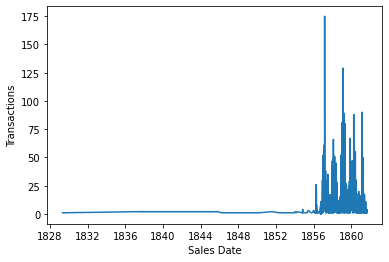

In [46]:
y = df['Transactions']
sns.lineplot(data=df,x=df.index,y=y)

In [47]:
df['Transactions'].max()

175.0